In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7fa685a64dc0>)

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [7]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer. 

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [10]:
pip install jovian

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import jovian

<IPython.core.display.Javascript object>

In [12]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/jovian-1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/jovian-1


'https://jovian.ai/mujtabakhurram2/jovian-1'

In [13]:
pip install plotly matplotlib seaborn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [16]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [17]:
fig = px.histogram(medical_df, 
                   x='age', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.histogram(medical_df,  x = 'bmi',marginal = 'box', color_discrete_sequence=['red'],title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

In [19]:
fig = px.histogram(medical_df, x='charges', marginal = 'box', color = 'smoker', color_discrete_sequence = ['green', 'grey'],title = 'Annual Medical Charges')
fig.update_layout(bargap= 0.1)
fig.show()

In [20]:
fig = px.histogram(medical_df, x='charges', marginal = 'box', color = 'sex', color_discrete_sequence = ['green', 'grey'],title = 'Annual Medical Charges')
fig.update_layout(bargap= 0.1)
fig.show()

In [21]:
fig = px.histogram(medical_df, x='charges', marginal = 'box', color = 'region', color_discrete_sequence = ['green', 'grey','red','orange'],title = 'Annual Medical Charges')
fig.update_layout(bargap= 0.1)
fig.show()

In [22]:
medical_df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [23]:
px.histogram(medical_df, x ='smoker', color='sex', title='Smoker')

In [24]:
px.histogram(medical_df, x ='sex', color='sex', title='Sex')

In [25]:
px.histogram(medical_df, x ='region', color='region', title='Region')

In [26]:
px.histogram(medical_df, x ='children', color='children', title='Region')

In [27]:
fig = px.scatter(medical_df,x='age', y='charges',color='smoker',opacity = 0.8,hover_data=['sex'],title='Age vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [28]:
fig = px.scatter(medical_df,
           x = 'bmi',
           y = 'charges',
           color = 'smoker',
           opacity = 0.8,
           hover_data = ['sex'],
           title = 'BMI vs. Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/jovian-1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/jovian-1


'https://jovian.ai/mujtabakhurram2/jovian-1'

In [30]:
fig = px.violin(medical_df,
                y = 'charges',
                x = 'sex',
                color = 'smoker',
                hover_data = ['sex'],
                box = True,
                points = "all"
               )
fig.update_traces(marker_size = 5)
fig.show()                

In [31]:
fig = px.violin(medical_df,
                y = 'charges',
                x = 'region',
                color = 'region',
                hover_data = ['sex'],
                box = True,
                points = "all"
               )
fig.update_traces(marker_size = 5)
fig.show() 

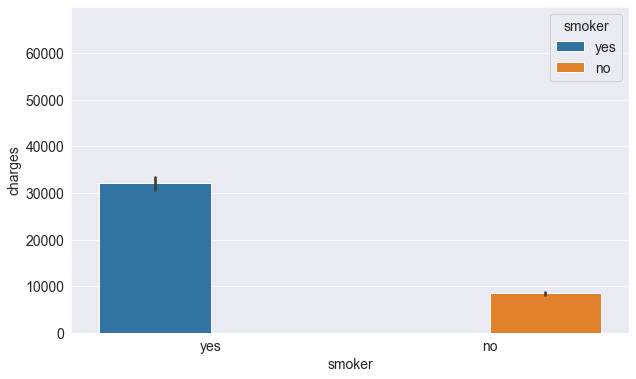

In [32]:
fig = sns.barplot( data = medical_df, x = 'smoker', y = 'charges', hue ='smoker')
scale_factor = 2
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.show()

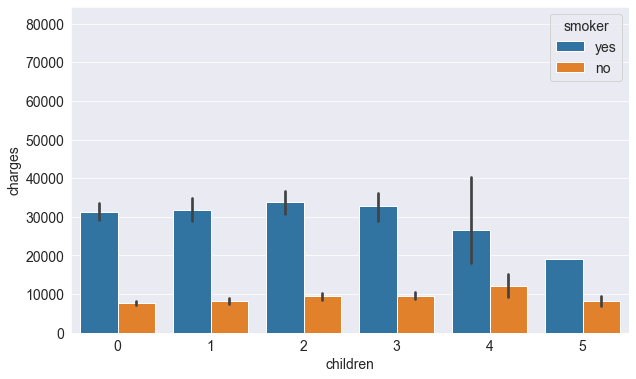

In [33]:
fig = sns.barplot( data = medical_df, x = 'children', y = 'charges', hue ='smoker')
scale_factor = 2
ymin, ymax = plt.ylim()
plt.ylim(ymin * scale_factor, ymax * scale_factor)
plt.show()

In [34]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [35]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [36]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [37]:
medical_df.corr()

age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000

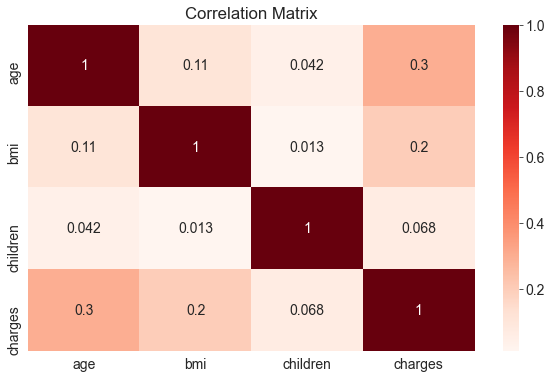

In [38]:
sns.heatmap(medical_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/jovian-1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/jovian-1


'https://jovian.ai/mujtabakhurram2/jovian-1'

# LINEAR REGRESSION

## Non smoker Linear Regression

In [40]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

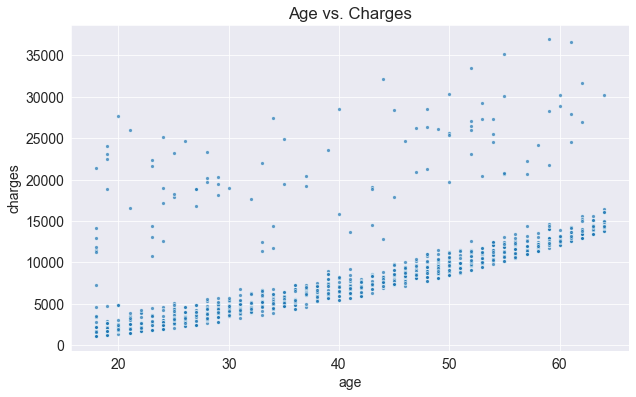

In [41]:
plt.title('Age vs. Charges')
sns.scatterplot(data = non_smoker_df, x ='age', y='charges', alpha = 0.7, s = 15);

In [42]:
def estimate_charges(age,w,b):
    return w*age + b

In [43]:
w = 50
b = 100

In [44]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages,w,b)

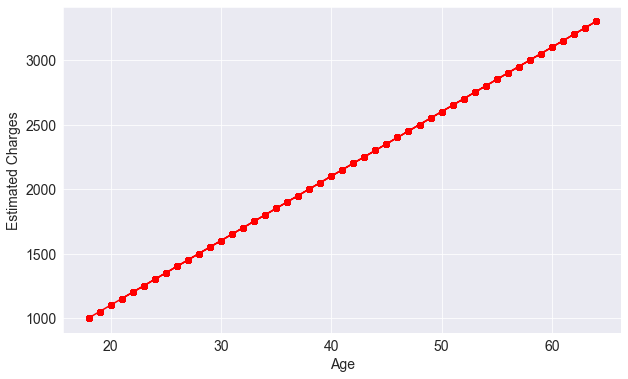

In [45]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

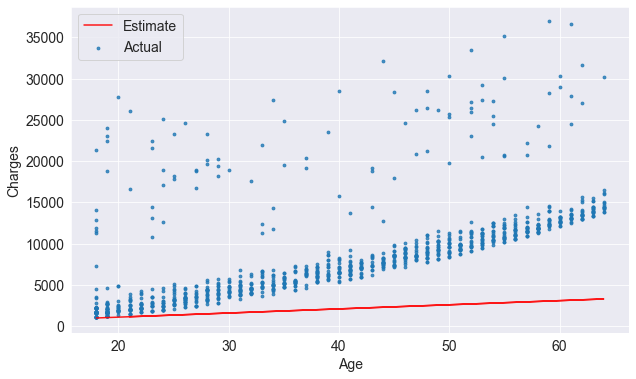

In [46]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha = 0.9);
plt.scatter(ages, target, s = 8, alpha = 0.8);
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [47]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.plot(ages, estimated_charges, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8, alpha = 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

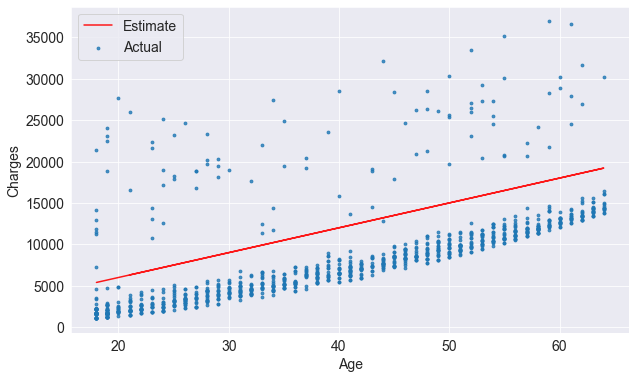

In [48]:
try_parameters(300,10)

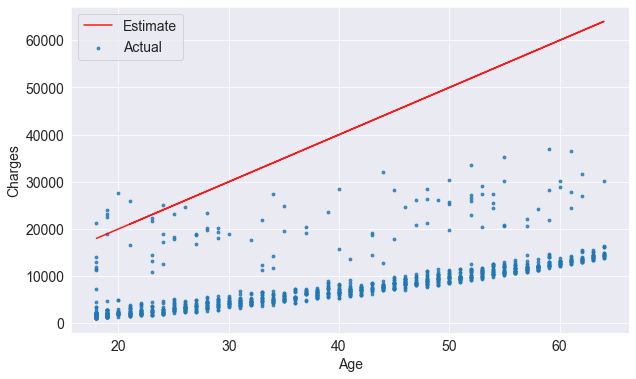

In [49]:
try_parameters(1000,0)

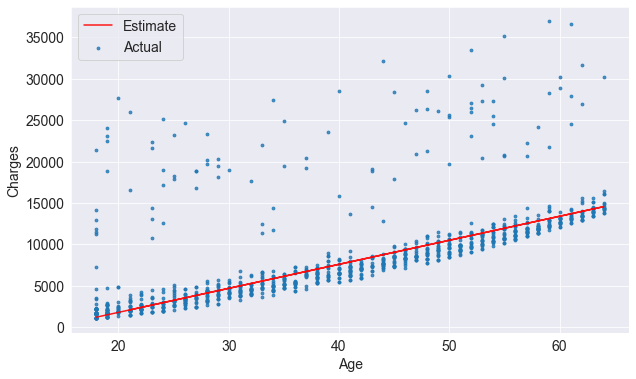

In [50]:
try_parameters(290,-4000)

In [51]:
import numpy as np

In [52]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

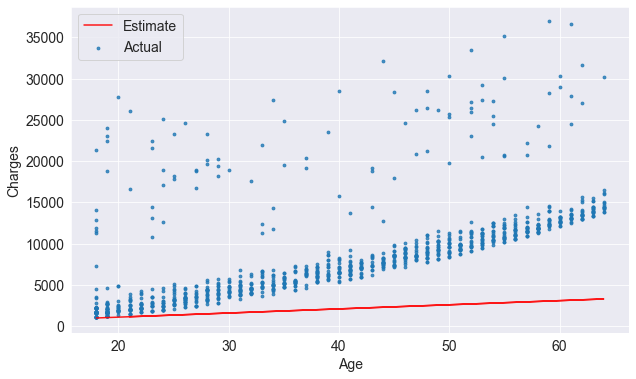

In [53]:
w = 50
b = 100
try_parameters(w,b)

In [54]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [55]:
rmse(targets, predicted)

8461.949562575493

In [56]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages,w,b)
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.plot(ages, predictions, 'r', alpha = 0.9)
    plt.scatter(ages, target, s=8, alpha = 0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE loss: ",loss)

RMSE loss:  5783.826568152254


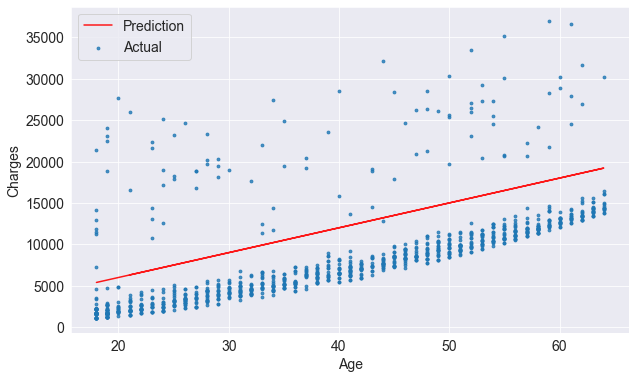

In [57]:
try_parameters(300,10)

RMSE loss:  5255.688032459636


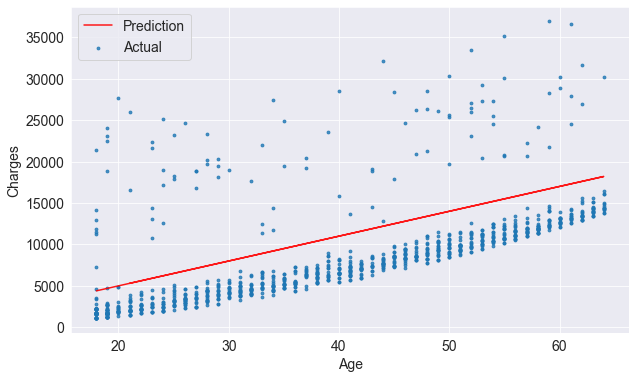

In [58]:
try_parameters(300,-1000)

RMSE loss:  5078.543491870157


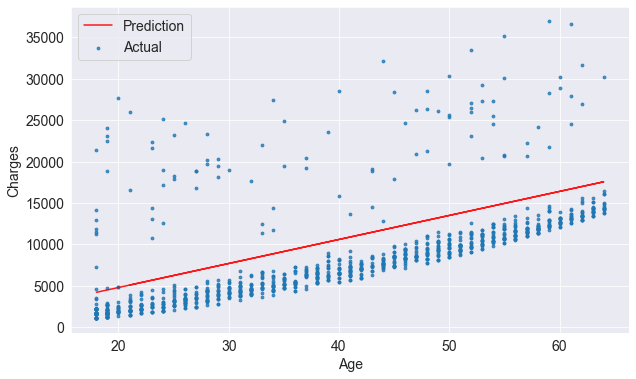

In [59]:
try_parameters(290,-1000)

RMSE loss:  4781.916463526881


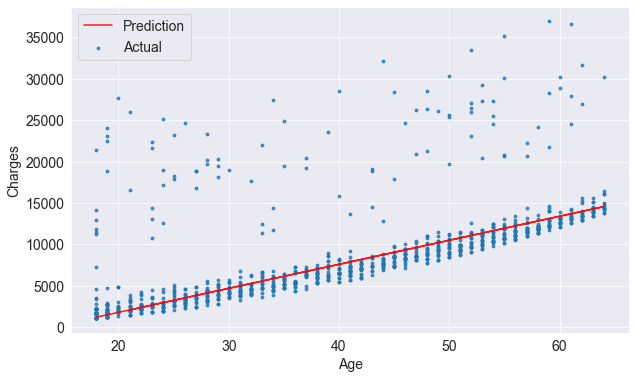

In [60]:
try_parameters(290,-4000)

RMSE loss:  4683.354573647129


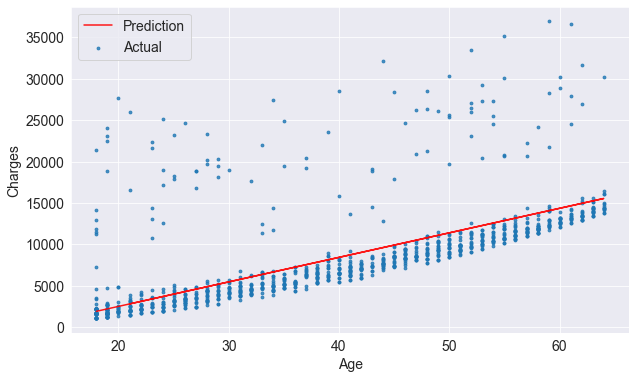

In [61]:
try_parameters(296,-3400)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [65]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape: ', inputs.shape)
print('targets.shape ', targets.shape)

inputs.shape:  (1064, 1)
targets.shape  (1064,)


In [66]:
model.fit(inputs,targets)

LinearRegression()

In [67]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [68]:
predictions = model.predict(inputs)

In [69]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [70]:
rmse(targets, predictions)

4662.505766636395

In [71]:
model.coef_

array([267.24891283])

In [72]:
model.intercept_

-2091.4205565650864

RMSE loss:  4662.505766636395


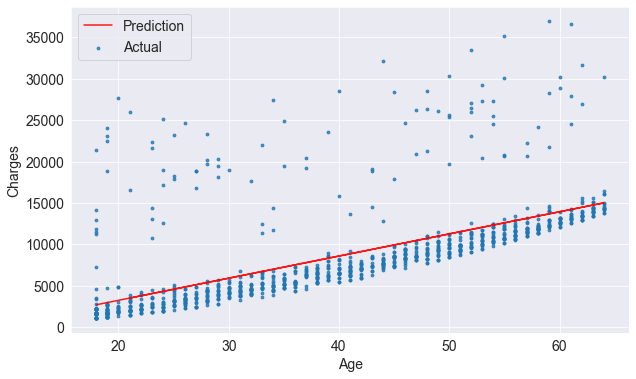

In [73]:
try_parameters(model.coef_, model.intercept_)

In [74]:
from sklearn.linear_model import SGDRegressor

In [75]:
modelS = SGDRegressor()

In [76]:
prediction = model.predict(inputs)

In [77]:
prediction

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [78]:
rmse(target,prediction)

4662.505766636395

In [79]:
model.coef_

array([267.24891283])

# Machine Learning

In [80]:
#create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

In [81]:
#create and train the model
model = LinearRegression().fit(inputs, targets)

In [82]:
#Generate predictions
predictions = model.predict(inputs)


In [83]:
#Compute loss to evaluate the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [84]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/jovian-1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/jovian-1


'https://jovian.ai/mujtabakhurram2/jovian-1'

# Linear Regression using Multiple Features

In [85]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [86]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

0.08403654312833268

In [87]:
fig = px.scatter(non_smoker_df, x='bmi', y='charges', title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [88]:
fig = px.scatter_3d(non_smoker_df, x='age', y='bmi', z='charges')
fig.update_traces(marker_size=3, marker_opacity=0.5)
fig.show()

In [89]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488727)

### BMI Linear Regression Model

In [90]:
inputs, targets = non_smoker_df[['bmi']], non_smoker_df['charges']

In [91]:
model = LinearRegression().fit(inputs, targets)

In [92]:
prediction = model.predict(inputs)

In [93]:
loss = rmse(targets, prediction)

In [94]:
loss

5969.772531913293

Thus the model is worse than the previously trained models using Age column

In [95]:
non_smoker_df.charges.corr(non_smoker_df.children)

0.13892870453542194

In [96]:
fig = px.strip(non_smoker_df, x='children', y='charges', title= "Children vs. Charges")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [97]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4608.470405038246


## Smokers Linear Regression Model

In [98]:
smoker_df = medical_df[medical_df.smoker == 'yes']

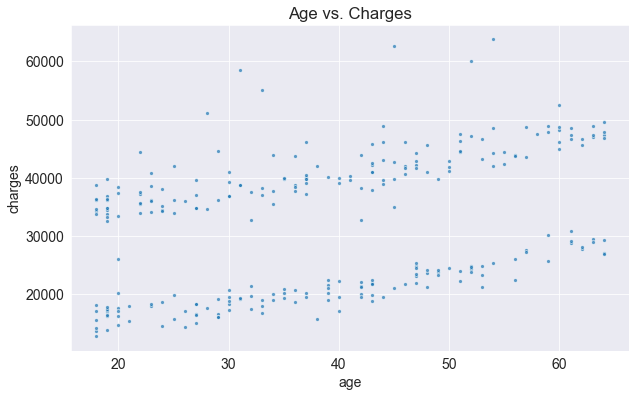

In [99]:
plt.title('Age vs. Charges')
sns.scatterplot(data = smoker_df, x ='age', y='charges', alpha = 0.7, s = 15);

In [100]:
w = 50
b = 100

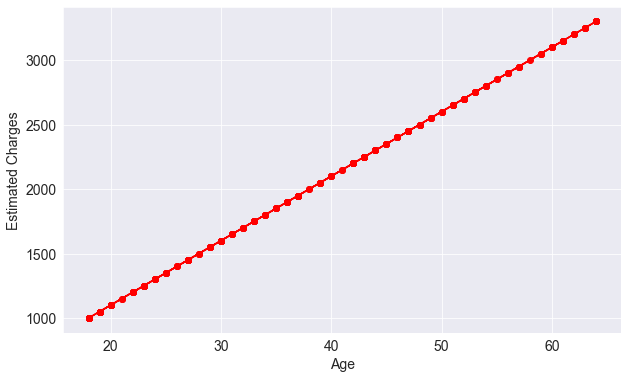

In [101]:
ages = smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

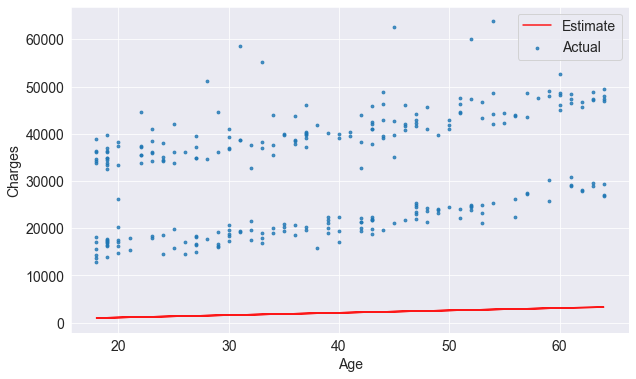

In [102]:
target = smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [103]:
def try_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

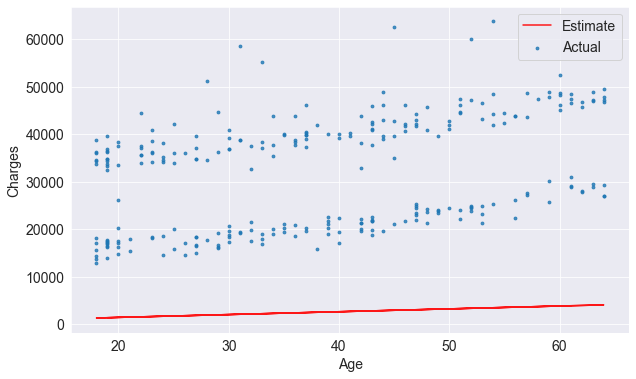

In [104]:
try_parameters(60, 200)

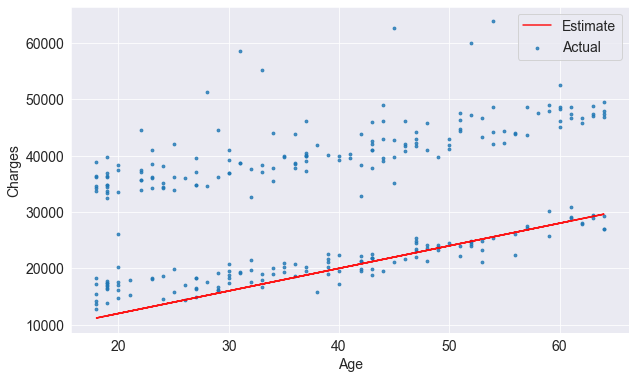

In [105]:
try_parameters(400, 4000)

In [106]:
targets = smoker_df['charges']
predicted = estimate_charges(smoker_df.age, w, b)

In [107]:
rmse(targets, predicted)

32074.58722734571

In [108]:
def try_parameters(w, b):
    ages = smoker_df.age
    target = smoker_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  16159.375031795793


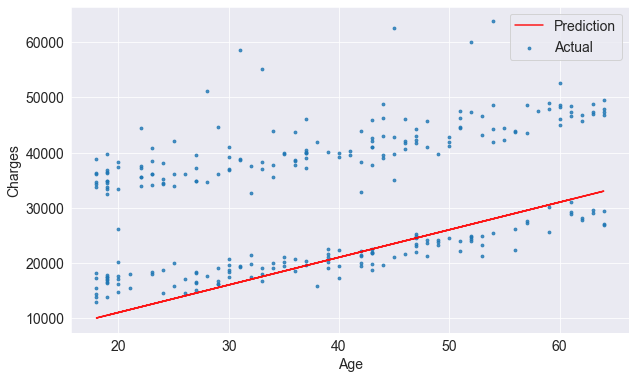

In [109]:
try_parameters(500, 1000)

RMSE Loss:  10715.29663363978


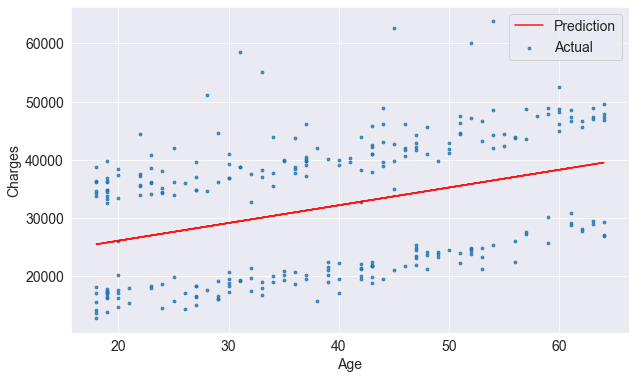

In [110]:
try_parameters(305, 20000)

In [111]:
inputs = smoker_df[['age']]
targets = smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (274, 1)
targes.shape : (274,)


In [112]:
model = LinearRegression()
model.fit(inputs, targets)

LinearRegression()

In [113]:
predictions = model.predict(inputs)

In [114]:
rmse(targets, predictions)

10711.00334810241

In [115]:
# w
model.coef_

array([305.23760211])

In [116]:
# b
model.intercept_

20294.128126915966

RMSE Loss:  10711.00334810241


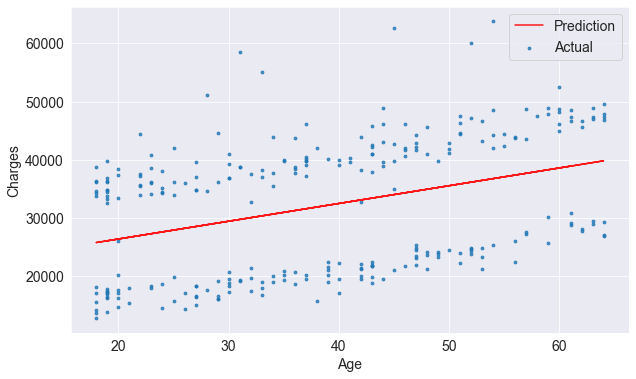

In [117]:
try_parameters(model.coef_,model.intercept_)

In [118]:
inputs, targets = smoker_df[['age', 'bmi', 'children']], smoker_df['charges']

In [119]:
model = LinearRegression().fit(inputs, targets)

In [120]:
predictions = model.predict(inputs)

In [121]:
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.2024805241535


## All Customers LR Model

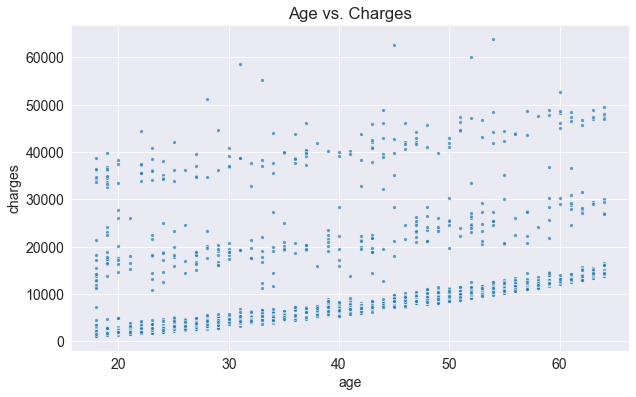

In [122]:
plt.title('Age vs. Charges')
sns.scatterplot(data = medical_df, x ='age', y='charges', alpha = 0.7, s = 15);

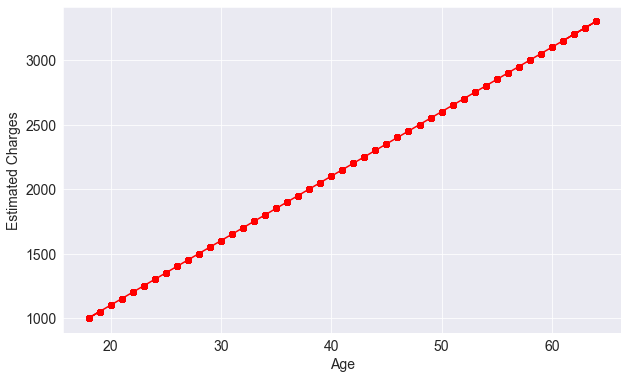

In [123]:
ages = medical_df.age
estimated_charges = estimate_charges(ages, w, b)
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

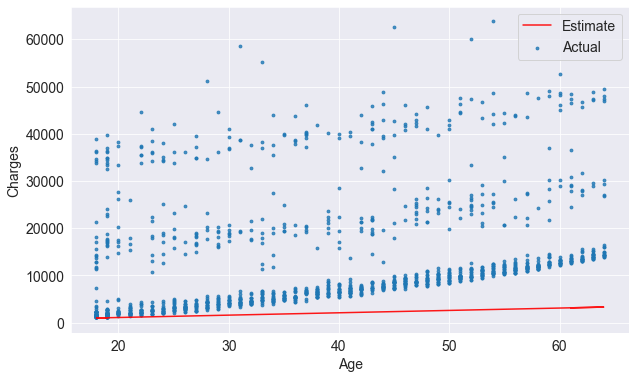

In [124]:
target = medical_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual']);

In [125]:
# Create inputs and targets
inputs, targets = medical_df[['age']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11551.66562075632


In [126]:
def try_parameters(w, b):
    ages = medical_df.age
    target = medical_df.charges
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  11551.66562075632


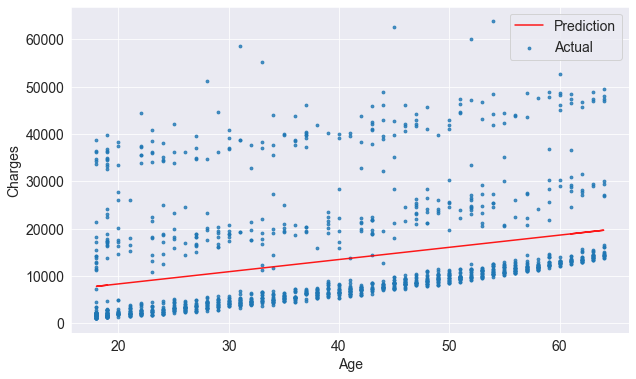

In [127]:
try_parameters(model.coef_, model.intercept_)

In [128]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


In [129]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/jovian-1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/jovian-1


'https://jovian.ai/mujtabakhurram2/jovian-1'

## Using Categorical Features for Machine Learning

So far we've been using only numeric columns, since we can only perform computations with numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset.

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:

1. If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1.
2. If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 0s.
3. If the categories have a natural order (e.g. cold, neutral, warm, hot), then they can be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals



In [130]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [131]:
medical_df.charges.corr(medical_df.smoker_code)

0.787251430498478

In [132]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [133]:
sex_codes = {'female': 0, 'male': 1}

In [134]:
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [135]:
medical_df.charges.corr(medical_df.sex_code)

0.057292062202025484

In [136]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


In [137]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown ='ignore')
enc_df = pd.DataFrame(enc.fit_transform(medical_df[['region']]).toarray())

In [138]:
medical_df = medical_df.join(enc_df)
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code    0    1    2    3  
0               1         0  0.0  0.0  0.0  1.0  
1               0         1  0.0  0.0  1.0  0.0  
2               0         1  0.0  0.0  1.0  0.0  
3               0         1  0.0  1.0  0.0  0.0  
4               0         1  0.0  1.0  0.0  0.0  
...           ...       ...  ...  ...  ...  ...  
1333            0         1  0.0  1.0  0.0  0.0  
1334            0         0  1.0  0.0  0.0  0.0  
1335            0         0  0.0  0.0  1.0  0.0  
1336            0         0  0.0  0.0  0.0  1.0  
1337            1         0  0.0  1.0  0.0  0.0  

[1338 rows x 13 columns]

In [139]:
medical_df = medical_df.rename(columns={0:'northeast',1:'northwest',2:'southeast',3:'southwest'})

In [141]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [143]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [144]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [145]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/jovian-1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/jovian-1


'https://jovian.ai/mujtabakhurram2/jovian-1'

In [146]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [147]:
model.intercept_

-12525.547811195444

In [148]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

feature        weight
0          age    256.856353
1          bmi    339.193454
2     children    475.500545
3  smoker_code  23848.534542
4     sex_code   -131.314359
5    northeast    587.009235
6    northwest    234.045336
7    southeast   -448.012814
8    southwest   -373.041756
9            1 -12525.547811

In [149]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code  northeast  northwest  southeast  southwest  
0               1         0        0.0        0.0        0.0        1.0  
1               0         1        0.0        0.0        1.0        0.0  
2               0         1        0.0        0.0        1.0        0.0  
3               0         1        0.0        1.0        0.0        0.0  
4               0         1        0.0        1.0        0.0        0.0  
...           ...       ...        ...        ...        ...        ...  
1333            0         1        0.0        1.0        0.0        0.0  
1334            0         0        1.0        0.0        0.0        0.0  
1335            0         0        0.0        0.0        1.0        0.0  
1336            0         0        0.0        0.0        0.0        1.0  
1337            1         0        0.0        1.0        0.0        0.0  

[1338 rows x 13 columns]

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
numeric_cols = ['age','bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [152]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [153]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [154]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [155]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [157]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [158]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5    northeast    587.009235
2     children    572.998210
6    northwest    234.045336
4     sex_code   -131.314359
8    southwest   -373.041756
7    southeast   -448.012814

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [168]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6055.597605089108


In [169]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6041.501944622769


In [170]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mujtabakhurram2/jovian-1" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mujtabakhurram2/jovian-1


'https://jovian.ai/mujtabakhurram2/jovian-1'